## Network Characterization

In [2]:
'''
Created on 2023-10-25 12:51:32
@author: caitgrasso
'''

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import cv2
from collections import Counter
from scipy.stats import linregress
import os
from matplotlib.patches import Patch
import matplotlib as mpl
from matplotlib.colors import ListedColormap

### Load data

In [3]:
BOT = 'bot_04'

# Load FC matrices
fc_before = np.loadtxt('../network_inference_data/fc_matrices/{}_before_mimat_w.csv'.format(BOT), delimiter=',')
fc_after = np.loadtxt('../network_inference_data/fc_matrices/{}_after_mimat_w.csv'.format(BOT), delimiter=',')

# Load spatial data
com_df_before = pd.read_csv('../spatial_data/raw_spatial/{}_before_centroids.csv'.format(BOT), header=0)
com_df_after = pd.read_csv('../spatial_data/raw_spatial/{}_after_centroids.csv'.format(BOT), header=0)

pixels_df_before = pd.read_csv('../spatial_data/raw_spatial/{}_before_pixels.csv'.format(BOT), header=0)
pixels_df_after = pd.read_csv('../spatial_data/raw_spatial/{}_after_pixels.csv'.format(BOT), header=0)

# Load  bot images
img_before = cv2.imread(f'../bot_images/{BOT}_before_00001.tiff')
img_after = cv2.imread(f'../bot_images/{BOT}_after_00001.tiff')

os.makedirs('../results/', exist_ok=True)
os.makedirs('../results/network_characterization_plots/',exist_ok=True)
os.makedirs(f'../results/network_characterization_plots/{BOT}/', exist_ok=True)

In [4]:
plt.rcParams.update({'font.size': 10, 'font.family': 'arial'})

### Segmentation of nodes included in the network

Before

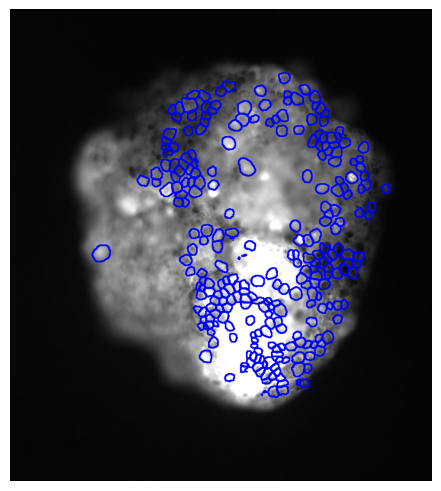

In [5]:
labels = np.unique(pixels_df_before['label'])

# Draw contours

# Note: (0,0) in OpenCV is top left. (0,0) in matplotlib is bottom left

contour_img = cv2.cvtColor(img_before, cv2.COLOR_BGR2GRAY)

for i in labels:
    xs = list(pixels_df_before[pixels_df_before['label']==i]['x'])
    ys = list(pixels_df_before[pixels_df_before['label']==i]['y'])

    mask = np.zeros(contour_img.shape, dtype=int)
    mask[xs,ys]=1
    
    if np.sum(mask) > 0:
        contours, _ = cv2.findContours(mask.astype(np.uint8), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
        cv2.drawContours(img_before, contours, -1, (0, 0, 255), 2)

fig,ax = plt.subplots(layout='constrained')
ax.imshow(img_before)
bbox_before = ax.get_window_extent().transformed(fig.dpi_scale_trans.inverted())
plt.axis('off')
# plt.savefig(f'../results/network_characterization_plots/{BOT}/{BOT}_before_segmentation.png', dpi=500, bbox_inches='tight')
plt.savefig(f'../../../Desktop/before.png', dpi=500, bbox_inches='tight', transparent=True)

After

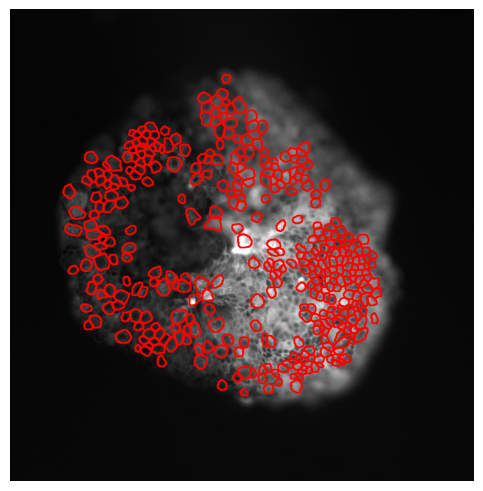

In [14]:
labels = np.unique(pixels_df_after['label'])

# Draw contours

contour_img = cv2.cvtColor(img_after, cv2.COLOR_BGR2GRAY)

for i in labels:
    xs = list(pixels_df_after[pixels_df_after['label']==i]['x'])
    ys = list(pixels_df_after[pixels_df_after['label']==i]['y'])

    mask = np.zeros(contour_img.shape, dtype=int)
    mask[xs,ys]=1
    
    if np.sum(mask) > 0:
        contours, _ = cv2.findContours(mask.astype(np.uint8), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
        cv2.drawContours(img_after, contours, -1, (255, 0, 0), 2)

fig,ax = plt.subplots(layout='constrained')
ax.imshow(img_after)
bbox_after = ax.get_window_extent().transformed(fig.dpi_scale_trans.inverted())
plt.axis('off')
# plt.savefig(f'../results/network_characterization_plots/{BOT}/{BOT}_after_segmentation.png', dpi=500, bbox_inches='tight')
plt.savefig(f'../../../Desktop/after.png', dpi=500, bbox_inches='tight', transparent=True)

### Visualize networks

In [7]:
def plot_edges(ax, mat, com_df, color=(0,0,1,0.6)):
    mat_vals = mat[np.triu_indices(mat.shape[0],k=1)]
    mat_edges_r,mat_edges_c = np.triu_indices(mat.shape[0],k=1)

    for i in range(len(mat_vals)):
        val = mat_vals[i]
        nodei_id = mat_edges_r[i]
        nodej_id = mat_edges_c[i]

        x1 = com_df.iloc[nodei_id]["y"]      
        y1 = com_df.iloc[nodei_id]["x"]      
        
        x2 = com_df.iloc[nodej_id]["y"]      
        y2 = com_df.iloc[nodej_id]["x"]  

        ax.plot([x1,x2],[y1,y2], c=color, linewidth=val*1.5)  

In [11]:
# NODE_COLOR = 'red'
# EDGE_COLOR = (0,0,1,0.4)

NODE_COLOR1 = 'blue'
EDGE_COLOR1 = mpl.colors.to_rgba('gray', alpha=0.5)

NODE_COLOR2 = 'red'
EDGE_COLOR2 = mpl.colors.to_rgba('gray', alpha=0.5)

Before

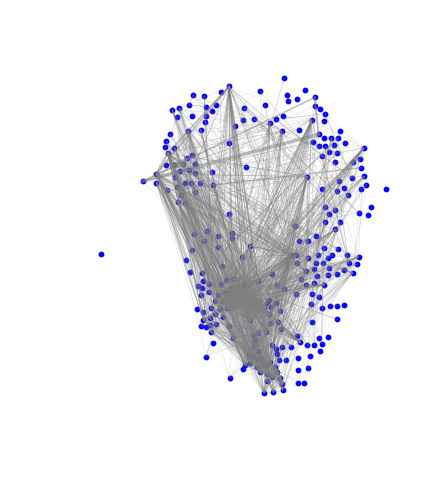

In [12]:
# Plot nodes 

fig,ax = plt.subplots(layout='constrained')

# background_cmap_before = ListedColormap([mpl.colors.to_rgba('tab:blue', alpha=0.3)])
# background_cmap_before = ListedColormap([187/256, 213/256, 232/256])
background_cmap_before = ListedColormap(['white'])


# FC
ax.tick_params(left = False, right = False , labelleft = False , labelbottom = False, bottom = False)
plt.setp(ax.spines.values(), visible=False)

background = np.ones((img_before.shape[0], img_before.shape[1])) # so nodes are in the same position as segmented cells above
ax.imshow(background, cmap=background_cmap_before)
ax.scatter(com_df_before["y"], com_df_before["x"], c=NODE_COLOR1, s=10)
plot_edges(ax, fc_before, com_df_before, color=EDGE_COLOR1)

# plt.savefig(f'../results/network_characterization_plots/{BOT}/{BOT}_before_network.png', dpi=500, bbox_inches='tight')
plt.savefig('../../../Desktop/network_before.png', dpi=500, bbox_inches='tight', transparent=True)
plt.show()

After

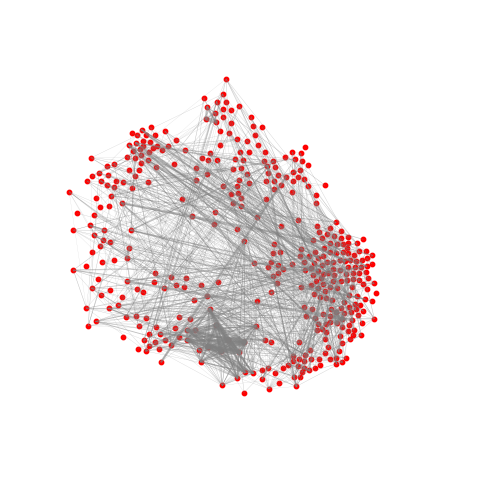

In [13]:
# Plot nodes 

fig,ax = plt.subplots(layout='constrained')

# background_cmap_after = ListedColormap([mpl.colors.to_rgba('tab:red', alpha=0.3)])
background_cmap_after = ListedColormap(['white'])
# background_cmap_after = ListedColormap([238/256, 186/256, 187/256])

# FC
ax.tick_params(left = False, right = False , labelleft = False , labelbottom = False, bottom = False)
plt.setp(ax.spines.values(), visible=False)

background = np.ones((img_after.shape[0], img_after.shape[1])) # so nodes are in the same position as segmented cells above
ax.imshow(background, cmap=background_cmap_after)
ax.scatter(com_df_after["y"], com_df_after["x"], c=NODE_COLOR2, s=10)
plot_edges(ax, fc_after, com_df_after, color=EDGE_COLOR2)

# plt.savefig(f'../results/network_characterization_plots/{BOT}/{BOT}_after_network.png', dpi=500, bbox_inches='tight')
plt.savefig('../../../Desktop/network_after.png', dpi=500, bbox_inches='tight', transparent=True)
plt.show()

### Number of nodes and edges

In [55]:
node_dict = {'before':[],'after':[]}
edge_dict = {'before':[],'after':[]}
density_dict = {'before':[],'after':[]}
BOTS = ['bot_01', 'bot_02', 'bot_03', 'bot_04', 'bot_05', 'bot_06']

for bot in BOTS:

    for phase in ['before','after']:

        fc = np.loadtxt('../network_inference_data/fc_matrices/{}_{}_mimat_w.csv'.format(bot, phase), delimiter=',')

        nodes = fc.shape[0] 
        edges = np.sum(fc[np.triu_indices(fc.shape[0],k=1)]>0)

        node_dict[phase].append(nodes)
        edge_dict[phase].append(edges)
        density_dict[phase].append(edges/((nodes * (nodes-1))/2))

Nodes

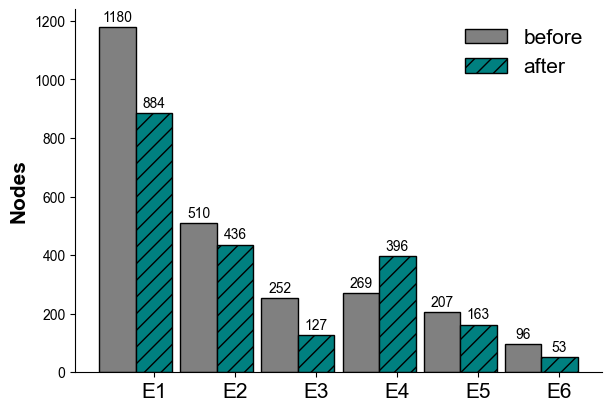

In [6]:
fig, ax = plt.subplots(figsize=(6,4), layout='constrained')

x = np.arange(len(BOTS))

width = 0.45
multiplier = 0

for label, val in node_dict.items():

    offset = width*multiplier
    # rects = ax.bar(x+offset, val, width, label=label)
    if label =='after':
        rects = ax.bar(x+offset, val, width, label=label, color='teal', edgecolor='k', hatch='//')
    else:
        rects = ax.bar(x+offset, val, width, label=label, color='gray', edgecolor='k')

    ax.bar_label(rects, padding=2)
    multiplier+=1

ax.set_ylabel('Nodes', fontsize=15, fontweight='bold')
ax.tick_params(axis='y', which='major', labelsize=10)

plt.gca().spines['top'].set_visible(False) 
plt.gca().spines['right'].set_visible(False) 

ax.set_xticks(x + width, ['E1','E2','E3','E4','E5','E6'], fontsize=15)
ax.legend(loc='upper right', fontsize=15, frameon=False)

plt.savefig('../results/network_characterization_plots/nodes.png', dpi=500, bbox_inches='tight')


Edges

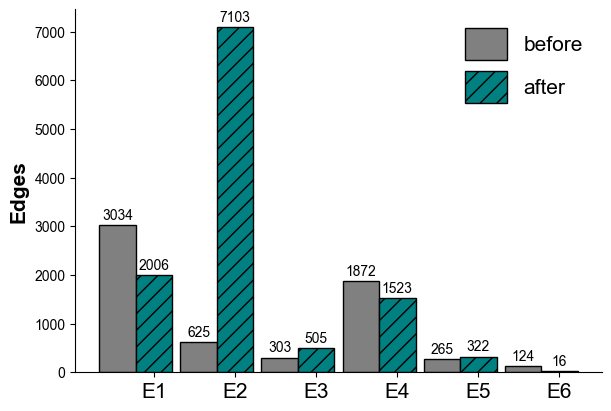

In [638]:
fig, ax = plt.subplots(figsize=(6,4), layout='constrained')

x = np.arange(len(BOTS))

width = 0.45
multiplier = 0

for label, val in edge_dict.items():

    offset = width*multiplier
    # rects = ax.bar(x+offset, val, width, label=label)
    if label =='after':
        rects = ax.bar(x+offset, val, width, label=label, color='teal', edgecolor='k', hatch='//')
    else:
        rects = ax.bar(x+offset, val, width, label=label, color='gray', edgecolor='k')

    ax.bar_label(rects, padding=2)
    multiplier+=1

ax.set_ylabel('Edges', fontsize=15, fontweight='bold')
ax.tick_params(axis='y', which='major', labelsize=10)

plt.gca().spines['top'].set_visible(False) 
plt.gca().spines['right'].set_visible(False) 

ax.set_xticks(x + width, ['E1','E2','E3','E4','E5','E6'], fontsize=15)
ax.legend(loc='upper right', fontsize=15, frameon=False)

plt.savefig('../results/network_characterization_plots/edges.png', dpi=500, bbox_inches='tight')

Density

['0.44%', '0.48%', '0.96%', '5.19%', '1.24%', '2.72%']
['0.51%', '7.49%', '6.31%', '1.95%', '2.44%', '1.16%']


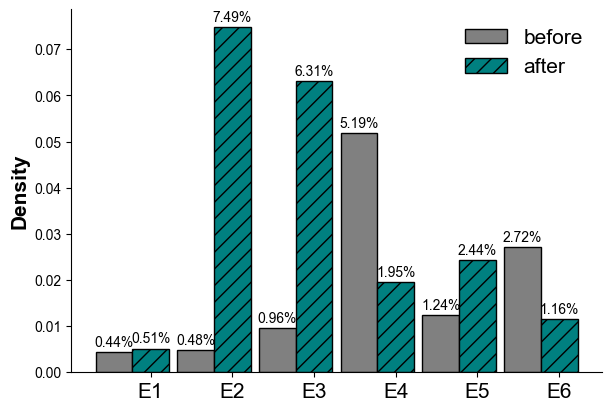

In [62]:
fig, ax = plt.subplots(figsize=(6,4), layout='constrained')

x = np.arange(len(BOTS))

width = 0.45
multiplier = 0

for label, val in density_dict.items():

    offset = width*multiplier
    # rects = ax.bar(x+offset, val, width, label=label)
    if label =='after':
        rects = ax.bar(x+offset, val, width, label=label, color='teal', edgecolor='k', hatch='//')
    else:
        rects = ax.bar(x+offset, val, width, label=label, color='gray', edgecolor='k')
    
    barlabels = [f'{np.round(x*100,2)}%' for x in val]
    print(barlabels)
    ax.bar_label(rects, labels=barlabels, padding=2)
    multiplier+=1

ax.set_ylabel('Density', fontsize=15, fontweight='bold')
ax.tick_params(axis='y', which='major', labelsize=10)

plt.gca().spines['top'].set_visible(False) 
plt.gca().spines['right'].set_visible(False) 

ax.set_xticks(x + width, ['E1','E2','E3','E4','E5','E6'], fontsize=15)
ax.legend(loc='upper right', fontsize=15, frameon=False)

plt.savefig('../results/network_characterization_plots/density.png', dpi=500, bbox_inches='tight')

### Degree Distributions

In [82]:
# Load degree distribution and null distribution
degdist_before = np.loadtxt(f'../network_analysis_data/degree_distributions/{BOT}_before_degree_distribution.csv', delimiter=',')
null_degdist_before = np.loadtxt(f'../network_analysis_data/null_degree_distributions/{BOT}_before.csv', delimiter=',')

degdist_after = np.loadtxt(f'../network_analysis_data/degree_distributions/{BOT}_after_degree_distribution.csv', delimiter=',')
null_degdist_after = np.loadtxt(f'../network_analysis_data/null_degree_distributions/{BOT}_after.csv', delimiter=',')

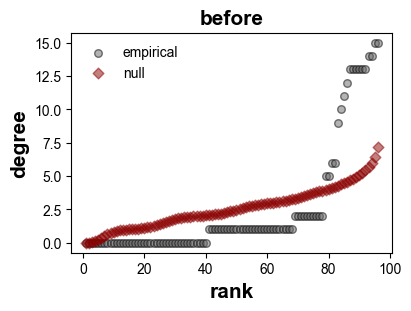

In [83]:
fig, ax = plt.subplots(figsize=(4,3), layout='constrained')

ax.scatter(np.arange(1, len(degdist_before)+1), sorted(degdist_before), s=30, c='dimgray', edgecolors='k', alpha=0.5)
ax.scatter(np.arange(1, len(null_degdist_before)+1), sorted(null_degdist_before), s=30, c='darkred', alpha=0.5, marker='D')

plt.ylabel('degree', fontweight='bold', fontsize=15)
plt.xlabel('rank', fontweight='bold', fontsize=15)
plt.legend(['empirical', 'null'], frameon=False)
plt.title('before',fontsize=15,fontweight='bold')
plt.savefig(f'../results/network_characterization_plots/{BOT}/{BOT}_before_degree_distribution.png', dpi=500, bbox_inches='tight')

plt.show()

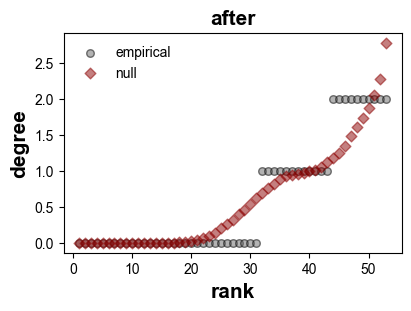

In [84]:
fig, ax = plt.subplots(figsize=(4,3), layout='constrained')

ax.scatter(np.arange(1, len(degdist_after)+1), sorted(degdist_after), s=30, c='dimgray', edgecolors='k',  alpha=0.5)
ax.scatter(np.arange(1, len(null_degdist_after)+1), sorted(null_degdist_after), s=30, c='darkred', alpha=0.5, marker='D')

plt.ylabel('degree', fontweight='bold', fontsize=15)
plt.xlabel('rank', fontweight='bold', fontsize=15)
plt.legend(['empirical', 'null'], frameon=False)
plt.title('after', fontsize=15, fontweight='bold')
plt.savefig(f'../results/network_characterization_plots/{BOT}/{BOT}_after_degree_distribution.png', dpi=500, bbox_inches='tight')

plt.show()